# III - Est-ce que le nutriscore contribue à améliorer la santé des français ? Dans ce but, est ce que le nutriscore permet de manger équilibrer ?


## Nos variables


Nous allons commencer par sélectionner les colonnes qu'il nous faut pour améliorer la santé des français.

Certains organismes officiels, comme l’AFSSA (Agence française de sécurité sanitaire des aliments), ont crée des recommandations sous forme d’apports nutritionnels conseillés (ANC) pour chaque type de nutriment.

source : https://www.vidal.fr/sante/nutrition/equilibre-alimentaire-adulte/recommandations-nutritionnelles-adulte/en-pratique.html

Selon le tableau nutritionnel, voici les informations dont nous avons besoin : Glucides, Lipides, Protéines, Fibres. Et les aliments qui contiennent de l'huile de palme sont à notifier.

Comment le Nutri-Score Fr est-il calculé?

Points négatifs : l'énergie, les graisses saturées, les sucres, et le sel (des niveaux élevés sont considérés comme mauvais pour la santé)

Points positifs : la proportion de fruits, de légumes, de noix, d'huiles d'olive, de colza et de noix, de fibres et de protéines (les niveaux élevés sont considérés comme bons pour la santé).

Sélectionnons donc seulement les colonnes nécessaires à notre étude. Nous sélectionnons tous les aliments même ceux qui ne sont pas vendu en France. En effet, ils peuvent être vendus prochainement et être interessant pour notre étude.

In [1]:
data.columns

NameError: name 'data' is not defined

In [167]:
data_study = data[["code", "product_name",  
            "ingredients_text","energy_100g", "carbohydrates_100g", "proteins_100g", "fat_100g",
            "saturated_fat_100g", "fiber_100g", "sugars_100g", "salt_100g",
             "additives_n", "ingredients_from_palm_oil",
            "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n", 
            "nutrition_grade_fr", "main_category", "nutrition_score_fr_100g", 'reg_additives',
       'reg_energy', 'reg_fat', 'reg_carbohydrates', 'reg_fiber', 
       'reg_protein']]

In [168]:
data_study=data_study.loc[(pd.isna(data.energy_100g)==False) & (pd.isna(data.carbohydrates_100g)==False) & (pd.isna(data.proteins_100g)==False) & (pd.isna(data.fat_100g)==False)
       & (pd.isna(data["fiber_100g"])==False)& (pd.isna(data["additives_n"])==False)
& (pd.isna(data["nutrition_score_fr_100g"])==False)
                 & (pd.isna(data["nutrition_grade_fr"])==False)
                 & (pd.isna(data["additives_n"])==False)]

## Quels sont ses caractéristiques ?

#### Techniquement, voici les éléments qui agit sur le nutriscore :

Points négatifs : l'énergie, les graisses saturées, les sucres, et le sel (des niveaux élevés sont considérés comme mauvais pour la santé)

Points positifs : la proportion de fruits, de légumes, de noix, d'huiles d'olive, de colza et de noix, de fibres et de protéines (les niveaux élevés sont considérés comme bons pour la santé).


## 1) Est - ce que si nous mangeons que des aliments avec un nutriscore A, serons - nous en bonne santé ?

### Comparons les informations  des différentes notes.

Excluons les données non renseignées du Nutriscore.

In [1689]:
dataN = data_study.loc[data["nutrition_grade_fr"]!="AUTRES"].sort_values(by=["nutrition_grade_fr"])


### Analyse bivariée : Etudions le lien entre la variable nutrition_grade_fr et les autres variables.

In [1690]:
dataN.describe()

,energy_100g,carbohydrates_100g,proteins_100g,fat_100g,saturated_fat_100g,fiber_100g,sugars_100g,salt_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_score_fr_100g,reg_additives,reg_energy,reg_fat,reg_carbohydrates,reg_fiber,reg_protein
count,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,51618.000000,64838.000000,64838.000000
mean,393.800472,12.297465,4.740160,3.089099,1.048028,1.452355,6.461460,0.895311,1.667032,0.005398,0.041534,2.278818,-2.209538,303.252969,-1.136552,3.801484,-2.268461,0.847448
std,244.823885,11.115141,6.129425,4.526895,2.005328,2.841038,8.245909,2.005498,2.225447,0.074111,0.216075,5.440175,3.728132,234.729574,5.369017,2.918439,3.783110,6.674019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-5.000000,-5.000000,-5.000000,1.000000,-5.000000,-5.000000
25%,197.000000,4.760000,0.700000,0.000000,0.000000,0.000000,0.900000,0.083820,0.000000,0.000000,0.000000,-1.000000,-5.000000,169.000000,-5.000000,1.000000,-5.000000,-5.000000
50%,347.000000,10.000000,2.560000,1.060000,0.000000,0.800000,3.330000,0.497840,1.000000,0.000000,0.000000,1.000000,-5.000000,327.000000,-5.000000,3.000000,-5.000000,2.260000
75%,573.000000,16.670000,6.060000,4.550000,1.330000,2.000000,9.357500,1.036320,2.000000,0.000000,0.000000,5.000000,1.000000,508.000000,2.250000,5.000000,1.250000,2.260000
max,901.000000,100.000000,86.000000,100.000000,87.000000,45.000000,100.000000,40.000000,24.000000,2.000000,4.000000,26.000000,9.000000,709.000000,42.900000,10.000000,25.000000,21.740000


In [1691]:
def percentile(n):
    def percentile_(x):
        y=x.loc[pd.isna(x)==False]
        return np.percentile(y, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [1692]:
for col in data_study.select_dtypes(include=['float64']).columns:
    print(col)
    print(dataN.groupby("nutrition_grade_fr")[col].agg([np.median,np.min, np.max, percentile(25), percentile(75)]))

energy_100g
                    median  amin   amax  percentile_25  percentile_75
nutrition_grade_fr                                                   
A                    310.0   0.0  900.0         184.00          448.0
B                    259.0   0.0  901.0         151.00          435.0
C                    448.0   0.0  901.0         259.00          649.0
D                    703.0   0.0  901.0         505.25          837.0
E                    220.0   0.0  896.0         176.00          736.0
carbohydrates_100g
                    median  amin    amax  percentile_25  percentile_75
nutrition_grade_fr                                                    
A                    9.385   0.0   90.58           4.58        14.7500
B                    8.860   0.0  100.00           4.58        13.7500
C                   11.200   0.0  100.00           5.70        20.1000
D                   13.270   0.0  100.00           4.20        25.7475
E                   10.900   0.0  100.00           9.

moyenne energy_100g = 393.80047194546404
moyenne carbohydrates_100g = 12.297464510009565
moyenne proteins_100g = 4.740160247077331
moyenne fat_100g = 3.0890985872482184
moyenne saturated_fat_100g = 1.048028095561245
moyenne fiber_100g = 1.4523551497578582
moyenne sugars_100g = 6.461460024985348
moyenne salt_100g = 0.8953109827327492
moyenne additives_n = 1.6670316789537
moyenne ingredients_from_palm_oil_n = 0.005398069033591413
moyenne ingredients_that_may_be_from_palm_oil_n = 0.0415342854498905
moyenne nutrition_score_fr_100g = 2.2788179771121873
moyenne reg_additives = -2.209537616829637
moyenne reg_energy = 303.2529689379685
moyenne reg_fat = -1.136552484654061
moyenne reg_carbohydrates = 3.8014839784571275
moyenne reg_fiber = -2.2684613960948825
moyenne reg_protein = 0.8474484098830932


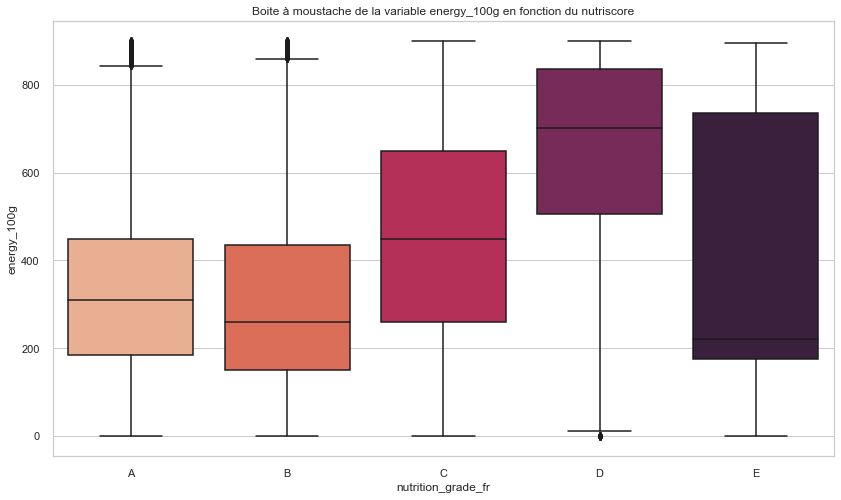

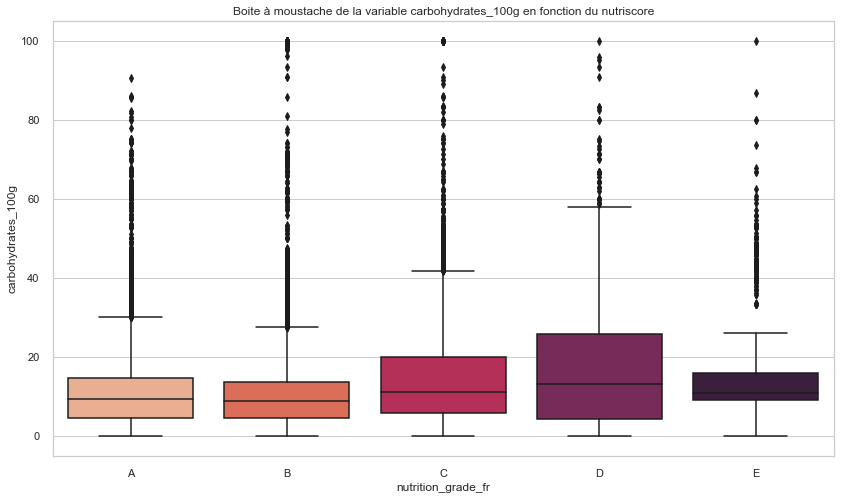

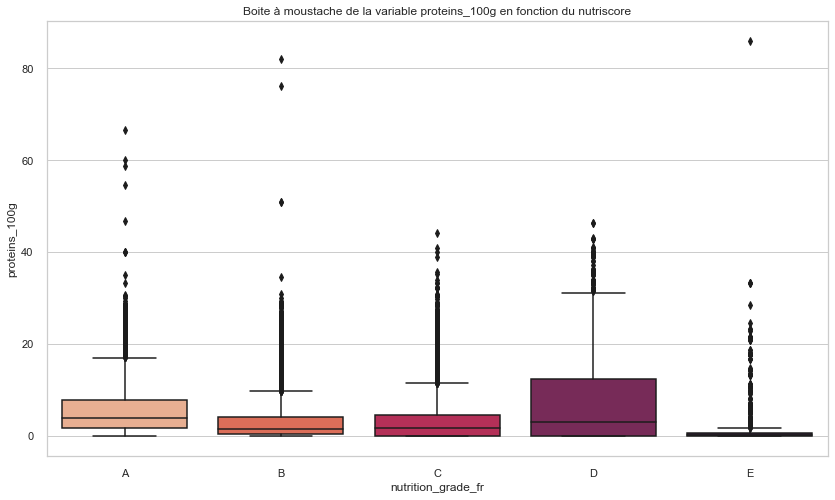

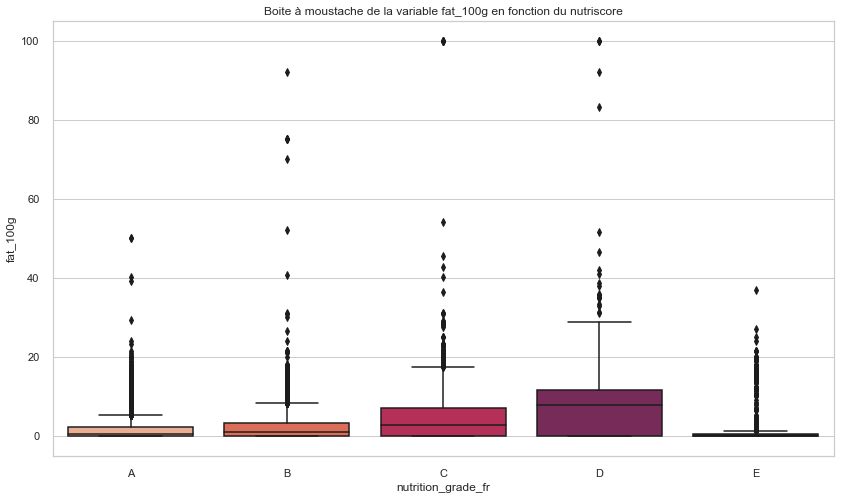

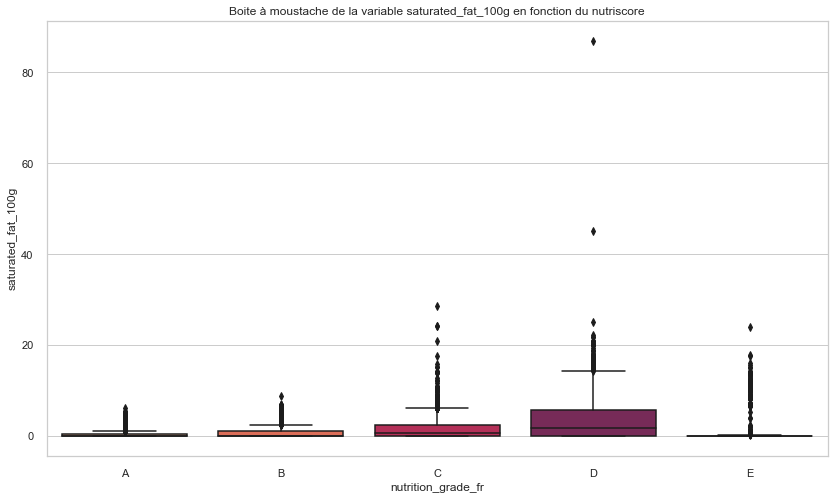

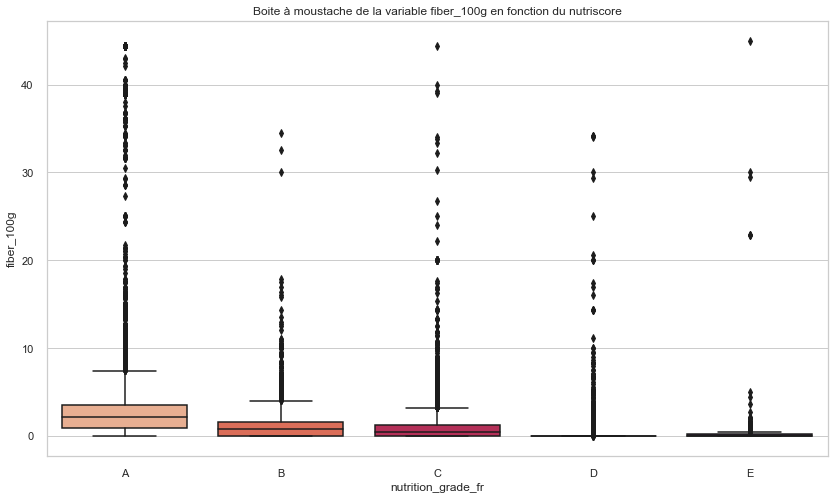

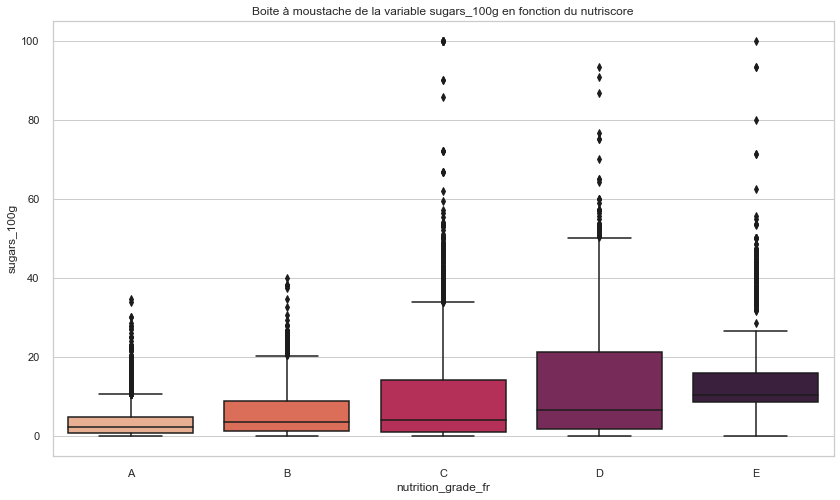

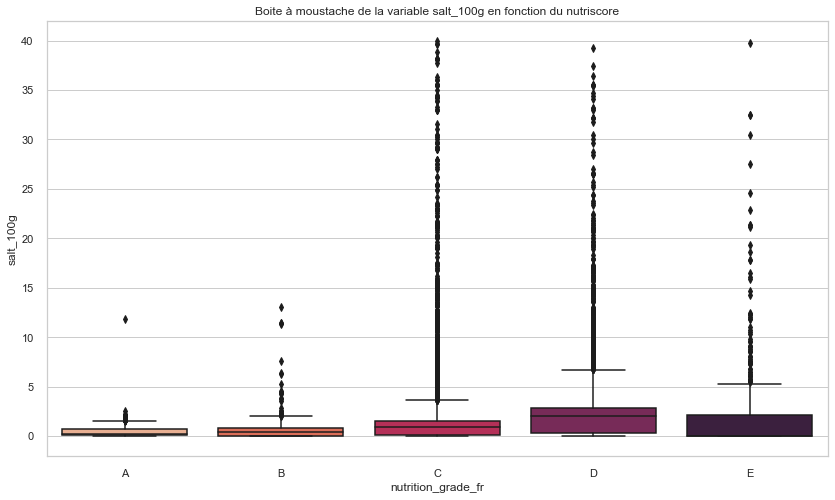

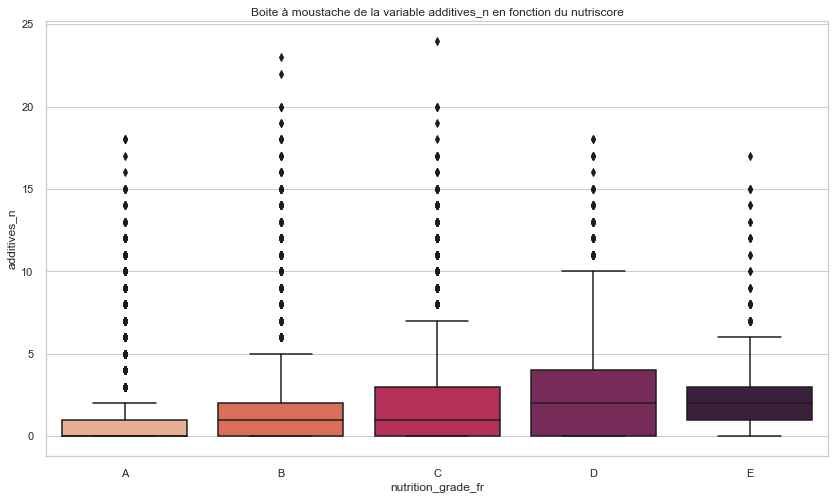

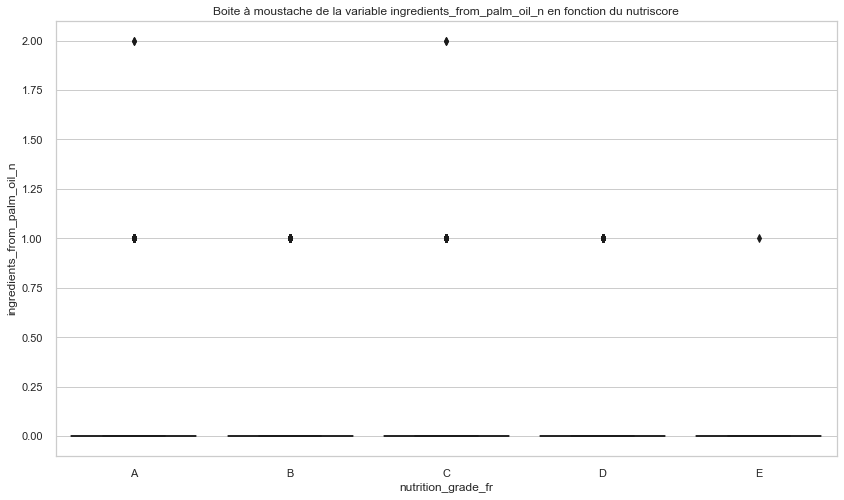

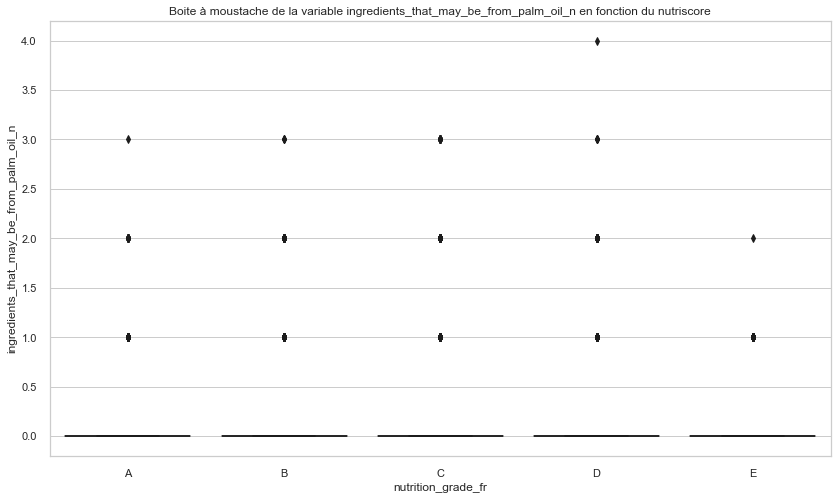

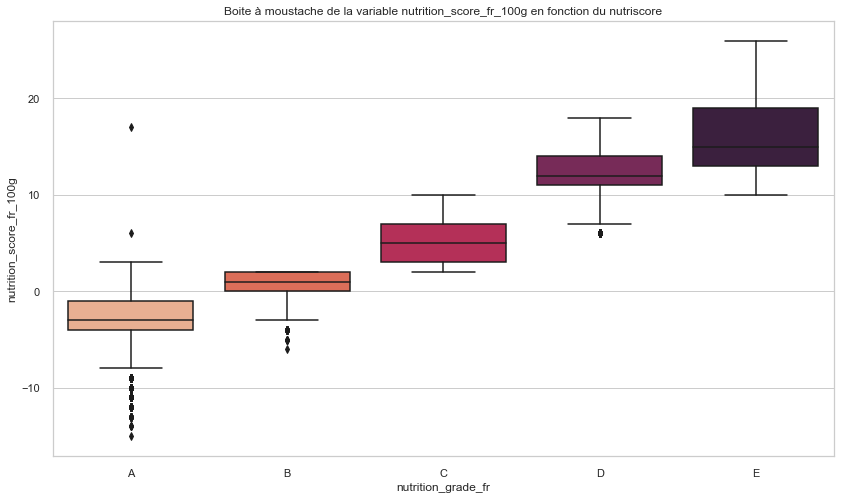

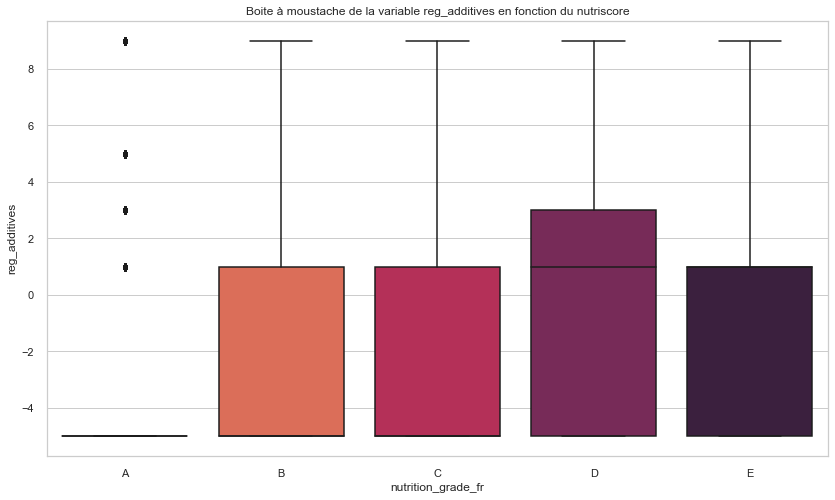

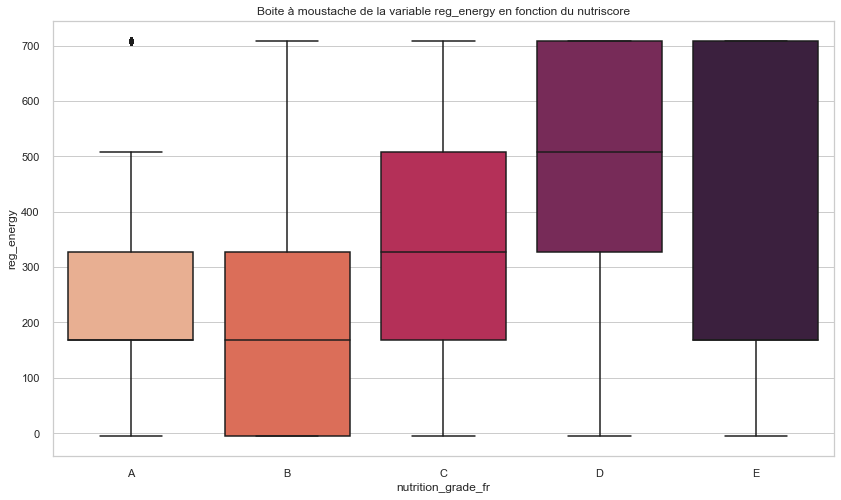

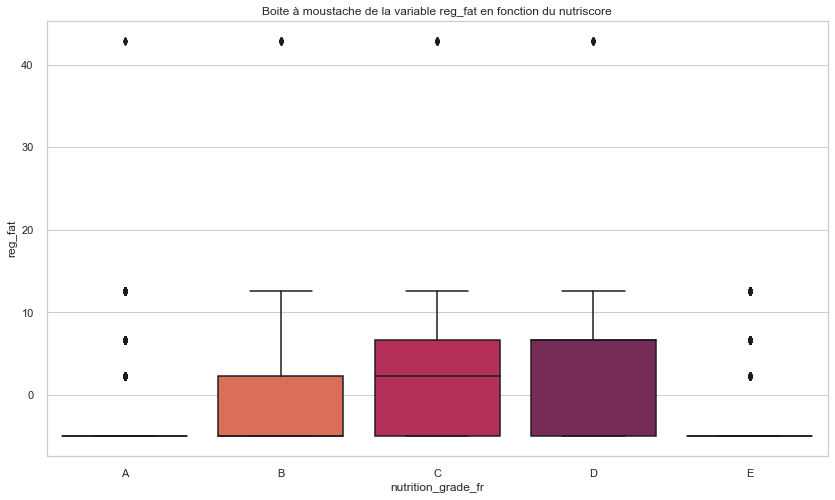

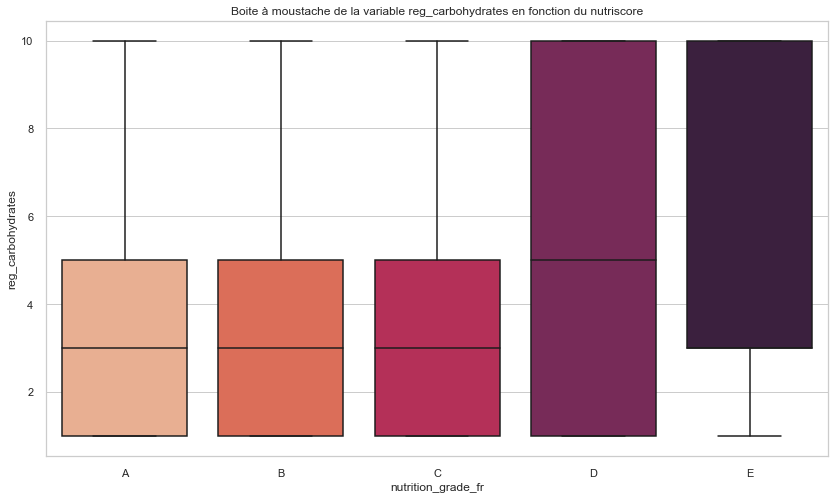

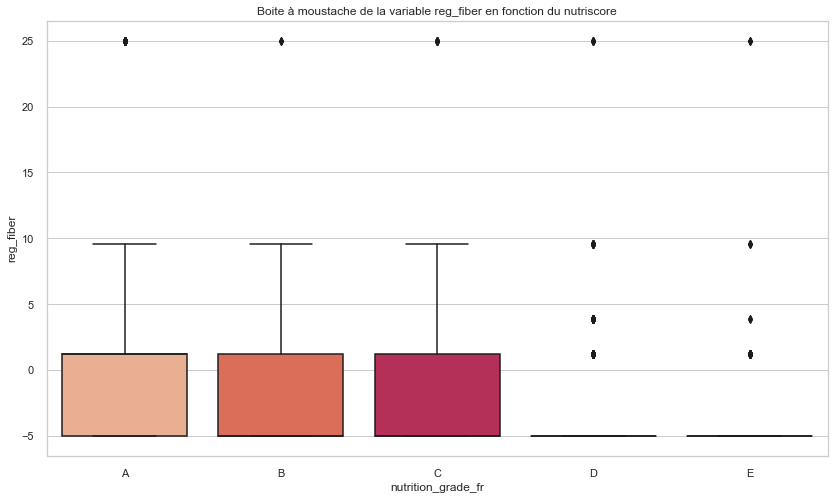

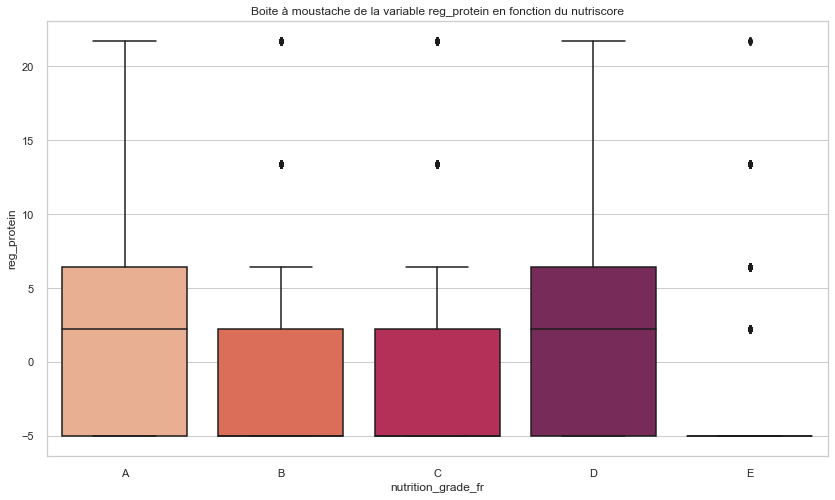

In [1693]:
for col in data_study.select_dtypes(include=['float64']).columns:
    print("moyenne "+col +" = "+str(dataN[col].mean()))
    pk.graph_boxplot_by_group(dataN, col,"nutrition_grade_fr", "Boite à moustache de la variable "+col+" en fonction du nutriscore", "rocket_r", (14,8))

Grâce à ces boites à moustache, nous remarquons qu'ils restent des données extrêmes. Mais dans ce contexte, nous devons les conserver pour ne pas perdre d'information.

Les boites à moustache sont peu dispersées même si en fonction des notes, leur dispersion peuvent plus ou moins varié.

Comment pouvons - nous décrire les aliments avec une note A ?
- riches en fibres et en proteines
- peu de sel, de sucre et de matières grasses (y compris en graisses saturés)
- faible en additifs
- apport en energie proche de la moyenne

Comment pouvons - nous décrire les aliments avec une note E ?
- riches en sucre, en additif et en glucides
- pauvres en fibres, proteines, sel
- une energie qui varie beaucoup dans les extrêmes.

In [1694]:
dataN.columns

Index(['code', 'product_name', 'ingredients_text', 'energy_100g',
       'carbohydrates_100g', 'proteins_100g', 'fat_100g', 'saturated_fat_100g',
       'fiber_100g', 'sugars_100g', 'salt_100g', 'additives_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'main_category', 'nutrition_score_fr_100g', 'reg_additives',
       'reg_energy', 'reg_fat', 'reg_carbohydrates', 'reg_fiber',
       'reg_protein'],
      dtype='object')

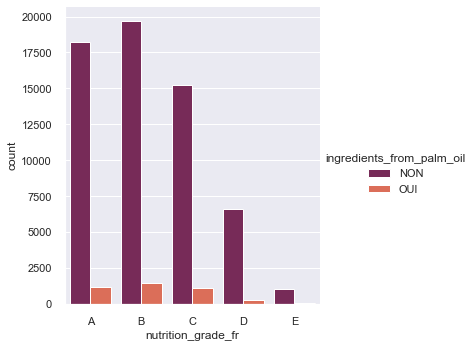

In [2906]:
sns.catplot(x = "nutrition_grade_fr", hue = "ingredients_from_palm_oil", data = dataN, kind = "count", palette="rocket")


Les produits qui contiennent potentiellement de l'huile de palme ont les meilleurs notes.

Confirmons nos résultats précédents en vérifiant le lien entre nos variables quantitatives et le grade du nutriscore

## 2) Statistiques inférentielles : ANOVA et Test de Krusdall-Wallis

## a) Essayons de modéliser nos données avec une ANOVA

Pour cela, nous pourrions modéliser nos données en réalisant une ANOVA.
Mais nous devons vérifier 3 hypothèses : 
- l'indépendance entre chaque groupe
- l'égalité des variances
- la normalité des résidus (cela permet de ne pas affirmer qu'il existe une différence de moyenne entre les groupes qui serait causée par le hasard).

### L'indépendance entre nos groupes

Selon le contexte, nous savons que chaque lettre du nutriscore est indépendante car elle représente un classement des aliments.

### L'égalité des variances

Réalisons un test de bartlet afin de confirmer ce que nous avons vu lors de l'analyse bivariée.

H0 : Les variances de chaque groupe sont égales si p-value > 5%

H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

Définissons nos groupes

In [1696]:
data_a=dataN.loc[data["nutrition_grade_fr"]=="A"]
data_b=dataN.loc[data["nutrition_grade_fr"]=="B"]
data_c=dataN.loc[data["nutrition_grade_fr"]=="C"]
data_d=dataN.loc[data["nutrition_grade_fr"]=="D"]
data_e=dataN.loc[data["nutrition_grade_fr"]=="E"]


Effectuons le test pour chaque variable quantitative

In [1697]:
for col in dataN.select_dtypes(include=['float64']).columns:
    print("colonne "+col+" "+str(scipy.stats.bartlett(data_a[col], data_b[col], data_c[col], data_d[col], data_e[col])))

colonne energy_100g BartlettResult(statistic=846.0396600055439, pvalue=8.169740494572308e-182)
colonne carbohydrates_100g BartlettResult(statistic=3015.4186311168914, pvalue=0.0)
colonne proteins_100g BartlettResult(statistic=2648.2872056698593, pvalue=0.0)
colonne fat_100g BartlettResult(statistic=12456.731310705556, pvalue=0.0)
colonne saturated_fat_100g BartlettResult(statistic=49645.701046678405, pvalue=0.0)
colonne fiber_100g BartlettResult(statistic=35782.67835417051, pvalue=0.0)
colonne sugars_100g BartlettResult(statistic=29343.982441035932, pvalue=0.0)
colonne salt_100g BartlettResult(statistic=95848.24729294154, pvalue=0.0)
colonne additives_n BartlettResult(statistic=1748.288670027734, pvalue=0.0)
colonne ingredients_from_palm_oil_n BartlettResult(statistic=11517.660740208745, pvalue=0.0)
colonne ingredients_that_may_be_from_palm_oil_n BartlettResult(statistic=8327.627219500984, pvalue=0.0)
colonne nutrition_score_fr_100g BartlettResult(statistic=21060.85990552185, pvalue=0.

Nous rejetons h0 pour toutes nos variables. Les variances ne sont pas égales.

La deuxième condition pour effectuer une ANOVA n'est pas validée.


In [1698]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('energy_100g ~ nutrition_grade_fr ', data=dataN).fit()
anova = sm.stats.anova_lm(model, typ=2)

anova

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,7.275993e+08,4.0,3733.594338,0.0
Residual,3.158648e+09,64833.0,NaN,NaN


H0 : les moyennes sont équivalent dans les groupes
H1 : les moyennes sont différentes
    
P<0.05 on rejette H0. et on admet H1.

#### Les résidus doivent suivre une loi normale

In [1699]:
import numpy as np
import statsmodels.api as sm
import pylab
from scipy.stats import shapiro
model = ols('energy_100g ~ nutrition_grade_fr', data=dataN).fit()
scipy.stats.normaltest(model.resid)

NormaltestResult(statistic=1991.2854177732297, pvalue=0.0)

~H0 : Les résidus suivent une loi normale si p-value > 5%~
H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

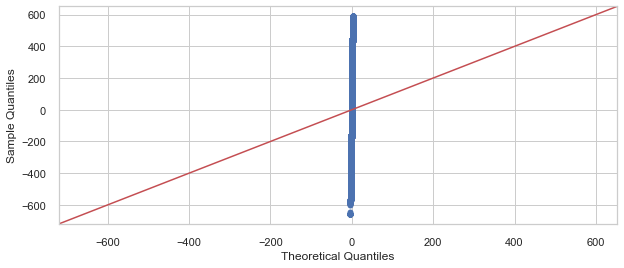

In [1700]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pylab
from scipy.stats import shapiro
model = ols('energy_100g ~ nutrition_grade_fr', data=dataN).fit()


sm.qqplot(model.resid, line='45')
pylab.show()

## b) Utilisons le test de Krusdall (utilise les rangs au lieu des moyennes)

- H0 :  la médiane de la population de tous les groupes est égale pvalue>0.05
- H1 :  la médiane de la population d'au moins un groupe n'est pas égale p-value<0.05

Test Krusdall(utilise mediane et quantile)

In [1701]:
for col in dataN.select_dtypes(include=['float64']).columns:
    print("colonne "+col+": "+ str(scipy.stats.kruskal(*[group[col] for name, group in dataN.groupby("nutrition_grade_fr")])))

colonne energy_100g: KruskalResult(statistic=10977.657873471639, pvalue=0.0)
colonne carbohydrates_100g: KruskalResult(statistic=1628.72575911094, pvalue=0.0)
colonne proteins_100g: KruskalResult(statistic=5002.772095817699, pvalue=0.0)
colonne fat_100g: KruskalResult(statistic=5485.459989451589, pvalue=0.0)
colonne saturated_fat_100g: KruskalResult(statistic=5587.963110374479, pvalue=0.0)
colonne fiber_100g: KruskalResult(statistic=14370.996258380785, pvalue=0.0)
colonne sugars_100g: KruskalResult(statistic=4696.182604690141, pvalue=0.0)
colonne salt_100g: KruskalResult(statistic=10133.075625299856, pvalue=0.0)
colonne additives_n: KruskalResult(statistic=4504.759402805176, pvalue=0.0)
colonne ingredients_from_palm_oil_n: KruskalResult(statistic=125.62260217216718, pvalue=3.3596662525280636e-26)
colonne ingredients_that_may_be_from_palm_oil_n: KruskalResult(statistic=511.2103130067605, pvalue=2.5197436759142743e-109)
colonne nutrition_score_fr_100g: KruskalResult(statistic=59777.55617

Signatifivement différent on rejette H0 car pvalue<5%

Selon le test, la mediane d'un groupe sont significativement différents pour chacunes des variables.

## Conclusion Nutriscore

 les aliments avec une note A ?
- riches en fibres et en proteines 
- peu de sel, de sucre et de matières grasses (y compris en graisses saturés)
- contiennent des fruits, végétaux ou des arachides
- faible en additifs
- apport en energie proche de la moyenne

 les aliments avec une note E ?
- riches en sucre, en additif et en glucides
- pauvres en fibres, proteines, sel
- une energie qui varie beaucoup dans les extrêmes.


Cependant, nous avons besoin d'une alimentation équilibrée. 

Voici l'apport quotidien pour un adulte : 

Glucides = 250g (carbohydrates)

lipides = 50 insaturé et 20 sature

Protéines =	45 g pour une personne de 55 kg
            60 g pour une personne de 75 kg
            
Fibres =	25 à 30 g dont une moitié issue des céréales et l'autre issue des fruits et légumes
    
Donc si nous mangeons que des produits A, cela ne nous permet pas de manger équilibrer et ne permet pas d'améliorer la santé.
Comment pouvons - nous améliorer la santé des français?